<a href="https://colab.research.google.com/github/hawkeyedatatsai/Maching-Learning-Mock-Classification/blob/main/Maching_Learning_Mock_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Your task is to use [this dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vTAQMDlyQdVuWy9le6OcM14fIZdQKg0s_PXhWUYIjUoB_rFpOz9Sv0K05ryiIQkTezghYtkLj6maFCW/pub?output=csv) to predict the fires using data from a smoke detector. The original dataset is from Kaggle.

This [link](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6#toc-dataset-7) has more description and gives us a data dict.

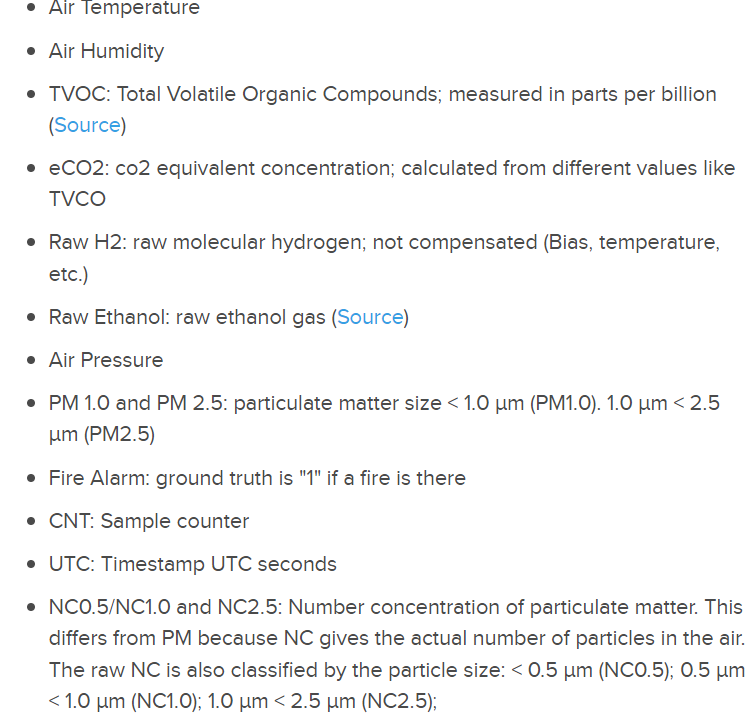

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
classification_report, ConfusionMatrixDisplay, f1_score, confusion_matrix
from IPython.core.display import clear_output
df = pd.read_csv("/content/2-smoke_detection_iot_BELT - smoke_detection_iot_BELT.csv")
print(df.shape)
print("\n")
print(df.info())
print("\n")
df.head()

(62633, 15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62633 entries, 0 to 62632
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62633 non-null  int64  
 1   UTC             62633 non-null  int64  
 2   Temperature[C]  43843 non-null  float64
 3   Humidity[%]     51985 non-null  float64
 4   eCO2[ppm]       62633 non-null  int64  
 5   Raw H2          47602 non-null  float64
 6   Raw Ethanol     62633 non-null  object 
 7   Pressure[hPa]   62633 non-null  object 
 8   PM1.0           62633 non-null  float64
 9   PM2.5           62633 non-null  float64
 10  NC0.5           62633 non-null  float64
 11  NC1.0           62633 non-null  float64
 12  NC2.5           62633 non-null  float64
 13  CNT             62633 non-null  int64  
 14  Fire Alarm      62633 non-null  int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 7.2+ MB
None




,Unnamed: 0,UTC,Temperature[C],Humidity[%],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1655127852,12.235,43.30,400,13314.0,High,med,1.71,1.78,11.77,1.835,0.041,3544,0
1,1,1654777894,24.580,53.32,400,12889.0,Low,High,1.71,1.78,11.79,1.838,0.042,16551,1
2,2,1654785729,26.920,NaN,406,12989.0,Low,High,1.95,2.03,13.43,2.095,0.047,24386,1
3,3,1654773681,24.900,51.13,577,NaN,Low,High,2.31,2.40,15.91,2.481,0.056,12338,1
4,4,1654779348,26.390,50.65,400,12910.0,Low,High,1.72,1.79,11.85,1.848,0.042,18005,1


In [ ]:
# unnamed, utc and cnt because they are only marking and counting the data
# drop them to hv a better resolution of data
df = df.drop(["Unnamed: 0", 'UTC', "CNT"], axis=1)
df.describe()

,Temperature[C],Humidity[%],eCO2[ppm],Raw H2,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,43843.000000,51985.000000,62633.000000,47602.000000,62633.000000,62633.000000,62633.000000,62633.000000,62633.000000,62633.000000
mean,15.952252,48.462203,670.008398,12943.810491,100.589507,184.458999,491.440068,203.576810,80.045255,0.714591
std,14.361454,9.368010,1905.840671,270.421548,922.502411,1976.258689,4265.560446,2214.685955,1083.357380,0.451612
min,-22.010000,-60.980000,400.000000,10668.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.932000,47.530000,400.000000,12831.000000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.124000,50.160000,400.000000,12924.000000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.415000,53.240000,438.000000,13109.000000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,13803.000000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [ ]:
df.describe(include="object" )

,Raw Ethanol,Pressure[hPa]
count,62633,62633
unique,8,6
top,Low,High
freq,27581,39303


#Prepare/clean the data for exploratory analysis purposes:


##Check for missing values. You should produce an output that shows the number of missing values for each feature.


In [ ]:
df.duplicated().sum()

541

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()
#no more duplicated rows anymore

0

In [ ]:
# Display the sum of missing values
df.isna().sum()
# result suggests missing values on both categorical and numerics column
# fire alarm, target to be, has no missing values

Temperature[C]    18252
Humidity[%]       10629
eCO2[ppm]             0
Raw H2            14970
Raw Ethanol           0
Pressure[hPa]         0
PM1.0                 0
PM2.5                 0
NC0.5                 0
NC1.0                 0
NC2.5                 0
Fire Alarm            0
dtype: int64

In [ ]:
df.isna().sum()/len(df)*100
# not going to drop columns since all are not significantly missing values

Temperature[C]    29.395091
Humidity[%]       17.118147
eCO2[ppm]          0.000000
Raw H2            24.109386
Raw Ethanol        0.000000
Pressure[hPa]      0.000000
PM1.0              0.000000
PM2.5              0.000000
NC0.5              0.000000
NC1.0              0.000000
NC2.5              0.000000
Fire Alarm         0.000000
dtype: float64

##For this task, handle missing values by using an appropriate imputation strategy (instead of dropping rows).

In [ ]:
# observations above suggest missing values only on numeric
mean_imputer = SimpleImputer(strategy = "median")

##Write a justification of your strategy for imputing missing values.

- For the numercial columns, I use simpleimputer with median strategy because there are few columns with std > 1000 meaning very broad range, several of the max are fairly big too. Mean could be impacted by these big maxs.

##Make sure you avoid any data leakage when you impute values.


##Ensure data types match the data types listed in the data dictionary (if given).


from df.info and reading through Dtype, "Raw Ethanol" and "Pressure[hPa]" are objective and the rest are numercial. Therefore, the data types in general match our understanding.

##Check for and address any inconsistent values in categorical columns.

In [ ]:
# check for inconsistent values in categorical columns
for col in list(df.select_dtypes(include='object')):
  print(col)
  print(df[col].value_counts())
  print()

Raw Ethanol
Low         27297
Medium      13123
low          7418
High         6928
medium       3615
high         1889
Very Low     1415
very low      407
Name: Raw Ethanol, dtype: int64

Pressure[hPa]
High    38877
high    10658
Med      8949
med      2454
Low       899
low       255
Name: Pressure[hPa], dtype: int64



In [ ]:
df['Raw Ethanol'] = df['Raw Ethanol'].replace({'low': 'Low', 'medium': 'Medium', 'high': 'High', 'very low': 'Very Low'})
df['Raw Ethanol'].value_counts()

Low         34715
Medium      16738
High         8817
Very Low     1822
Name: Raw Ethanol, dtype: int64

In [ ]:
df['Pressure[hPa]'] = df['Pressure[hPa]'].replace({'low': 'Low', 'med': 'Med', 'high': 'High'})
df['Pressure[hPa]'].value_counts()

High    49535
Med     11403
Low      1154
Name: Pressure[hPa], dtype: int64

In [ ]:
# another way to fix inconsistent values in categorical columns 
# cehck if it works
#df = df.apply(lambda x: x.lower() if type(x) == str else x)
#for col in list(df.select_dtypes(include='object')):
  #print(col)
  #print(df[col].value_counts())
  #print()

##Check for and address any impossible values in numeric columns.

In [ ]:
df.describe()

,Temperature[C],Humidity[%],eCO2[ppm],Raw H2,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,43840.000000,51463.000000,62092.000000,47122.000000,62092.000000,62092.000000,62092.000000,62092.000000,62092.000000,62092.000000
mean,15.951867,48.451543,670.986810,12943.677539,100.989549,185.209547,493.351898,204.406714,80.380054,0.714553
std,14.361860,9.385650,1907.817448,270.692835,924.378340,1981.012373,4274.191346,2220.091721,1086.477573,0.451631
min,-22.010000,-60.980000,400.000000,10668.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.928250,47.530000,400.000000,12831.000000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.123000,50.150000,400.000000,12924.000000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.418750,53.240000,438.000000,13109.000000,2.090000,2.180000,14.410000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,13803.000000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [ ]:
#what caught my eyes is that min Humidity is negative. Based on the list of different scenarios which are captured
#no way theres negative Humidity. plan to drop them if i see any
df.drop(df.loc[df["Humidity[%]"] <= 0].index, inplace=True)
print(df.describe())
print("\n")
df.info()

       Temperature[C]   Humidity[%]     eCO2[ppm]        Raw H2         PM1.0  \
count    43790.000000  51413.000000  62042.000000  47072.000000  62042.000000   
mean        15.952587     48.547654    671.175800  12943.654997    101.069613   
std         14.364885      8.868620   1908.573409    270.787914    924.746448   
min        -22.010000     10.740000    400.000000  10668.000000      0.000000   
25%         10.934500     47.540000    400.000000  12831.000000      1.280000   
50%         20.124500     50.160000    400.000000  12924.000000      1.810000   
75%         25.424750     53.250000    438.000000  13109.000000      2.090000   
max         59.930000     75.200000  60000.000000  13803.000000  14333.690000   

              PM2.5         NC0.5         NC1.0         NC2.5    Fire Alarm  
count  62042.000000  62042.000000  62042.000000  62042.000000  62042.000000  
mean     185.357431    493.740382    204.570023     80.444799      0.714484  
std     1981.803627   4275.891407   

#Explore the data:


##Create at least two different types of exploratory visualizations.


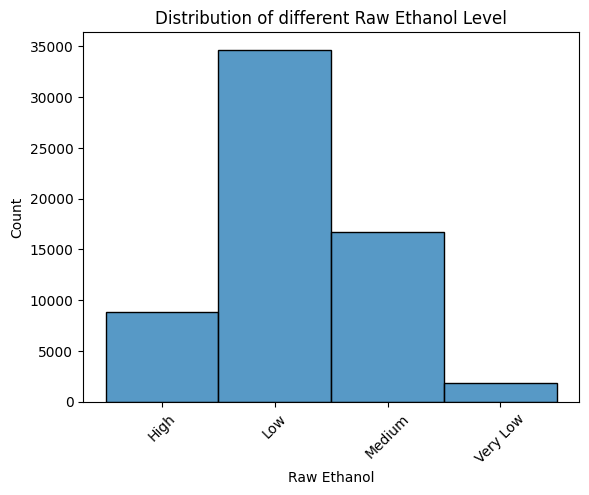

In [ ]:
# Histogram
ax = sns.histplot(data=df, x='Raw Ethanol', bins="auto", edgecolor = 'black') 
ax.tick_params(axis='x', rotation = 45)
## Set the Title
ax.set_title('Distribution of different Raw Ethanol Level');

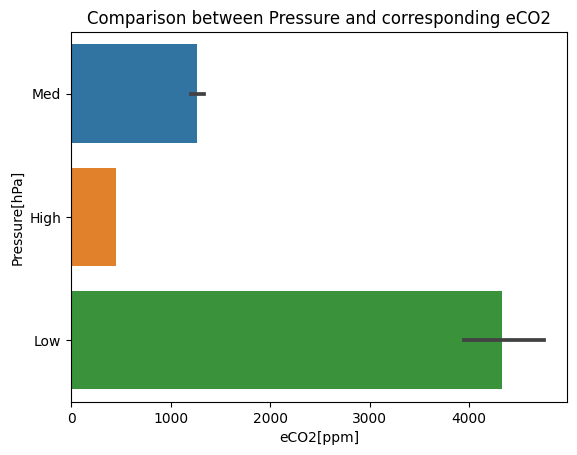

In [ ]:
#barplot
ax = sns.barplot(data=df, x='eCO2[ppm]', y='Pressure[hPa]')
ax.set_title("Comparison between Pressure and corresponding eCO2");

<ipython-input-18-03f7afabb904>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

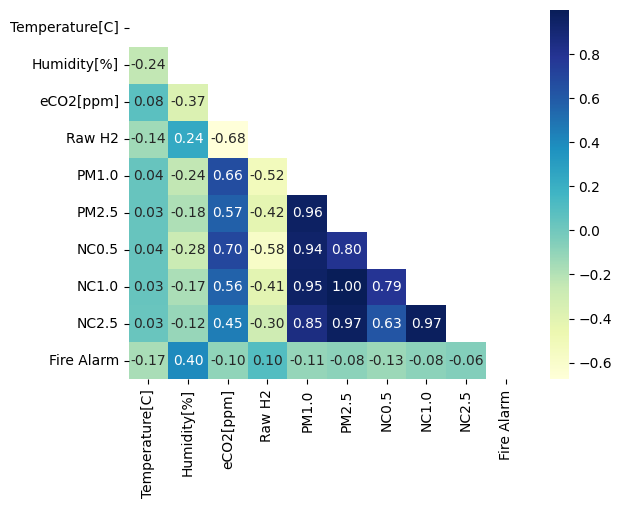

In [ ]:
# Correlation Heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, fmt=".2f", mask = mask)

##Write one to two sentences about what each visualization tells you about the data.

- It is observed from Histogram that low Raw Ethanol are most often seen in this data set.

- The result of barplot suggest low pressure has the highest eCO2[ppm].


- From correlation heatmap, it is observed that PMs are highly correlated to NCs. Which makes sense bacause usually the concentration of matter is related to its matter size.

#Prepare the data appropriately for modeling:


In [ ]:
#split data
y = df['Fire Alarm']
X = df.drop(columns =['Fire Alarm'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# check balance of target data
y.value_counts()
# results shows an inbalanced data where most are 1s

1    44328
0    17714
Name: Fire Alarm, dtype: int64

In [ ]:
# on numeric with mising value (Temperature[C], Humidity[%] and Raw H2)
## instantiate scaler
scaler = StandardScaler()
##since theres missing value, pipeline is used
missing_num_pipeline = make_pipeline(mean_imputer, scaler)
##identifying cols we intend to impute then finalizes tuple
missing_num_cols =['Temperature[C]', 'Humidity[%]', 'Raw H2']
missing_num_tuple = (missing_num_pipeline, missing_num_cols)

# on numeric w/o mising value (eCO2, PMs and so on)
# still scale it but not going to make a pipeline
# bacause no missing value
scaler = StandardScaler()
num_cols =['eCO2[ppm]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
num_tuple = (scaler, num_cols)

# on ordinal (Pressure[hPa], Raw Ethanol)
## instantiate scaler
scaler = StandardScaler()

# instantiate and fit ordinal encoders
raw_ethanol_categories = ['Very Low', 'Low', 'Medium', 'High']
pressure_categories = ['Low', 'Med', 'High']

ord = OrdinalEncoder(categories=[raw_ethanol_categories, pressure_categories])
#handle_unknown="use_encoded_value"

ord_pipeline = make_pipeline(ord, scaler)
ord_cols =  ['Raw Ethanol', 'Pressure[hPa]']
ord_tuple = (ord_pipeline, ord_cols)

# Instantiate the make column transformer
preprocessor = make_column_transformer(missing_num_tuple, num_tuple, ord_tuple,
                                       remainder="drop", verbose_feature_names_out=False)
# Fit to X train
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature[C]', 'Humidity[%]', 'Raw H2']),
                                ('standardscaler', StandardScaler(),
                                 ['eCO2[ppm]', 'PM1.0', 'PM2.5', 'NC0.5',
                                  'NC1.0', 'NC2.5']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Low',
                                                                              'Med',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Raw Ethanol', 'Pressure[hPa]'])],
                  verbose_feature_names_out=False)

##Implement a preprocessing pipeline to avoid data leakage.Scale the data if your model requires it.


##Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).

#Create and compare at least 2 different models:


##Put your preprocessing and models into pipelines.


##For each model type, create a default version of each model with default hyperparameters.


In [ ]:
#default logreg
logreg = LogisticRegression()
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Temperature[C]',
                                                   'Humidity[%]', 'Raw H2']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['eCO2[ppm]', 'PM1.0',
                                                   'PM2.5', 'NC0.5', 'NC1.0',
                                                   'NC2.5']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Very '
                                                                                               'Low',
                                                                                               'Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Med',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Raw Ethanol',
                                                   'Pressure[hPa]'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression())])

In [ ]:
#tuned logreg
tuned_logreg = LogisticRegression()
tuned_logreg_pipe = make_pipeline(preprocessor, tuned_logreg)

#start tuning with GS
log_params = {'logisticregression__penalty': ['l1', 'l2'],
          'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
tuned_logreg_gs = GridSearchCV(tuned_logreg_pipe, log_params)
tuned_logreg_gs.fit(X_train, y_train)

#get best params
tuned_logreg_gs.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}

In [ ]:
# instantiate tuned model
best_tuned_logreg_pipe = tuned_logreg_gs.best_estimator_

In [ ]:
#default KNN
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Temperature[C]',
                                                   'Humidity[%]', 'Raw H2']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['eCO2[ppm]', 'PM1.0',
                                                   'PM2.5', 'NC0.5', 'NC1.0',
                                                   'NC2.5']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Very '
                                                                                               'Low',
                                                                                               'Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Med',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Raw Ethanol',
                                                   'Pressure[hPa]'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
#tuned knn
tuned_knn = KNeighborsClassifier()
tuned_knn_pipe = make_pipeline(preprocessor, tuned_knn)
tuned_knn_pipe.fit(X_train, y_train)

#start tuning with GS
knn_params = {'kneighborsclassifier__n_neighbors' : [5,7,9,11,13,15],
          'kneighborsclassifier__weights' : ['uniform','distance'],
          'kneighborsclassifier__metric' : ['minkowski','euclidean','manhattan']}
tuned_knn_gs = GridSearchCV(tuned_knn_pipe, knn_params)
tuned_knn_gs.fit(X_train, y_train)

#get best params
tuned_knn_gs.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__weights': 'distance'}

In [ ]:
# instantiate tuned model
best_tuned_knn_pipe = tuned_knn_gs.best_estimator_



##Create additional versions of each model type where you tune hyperparameters for each model.


##Use appropriate metrics to evaluate each model.

In [ ]:
def classification_metrics(model_pipe, X_train, X_test, y_train, y_test, name):
  
  y_train_pred = model_pipe.predict(X_train)
  class_metrics_df.at[name, 'Train Accuracy'] = round(accuracy_score(y_train, y_train_pred), 3)
  class_metrics_df.at[name, 'Train Recall (Sensitivity)'] = round(recall_score(y_train, y_train_pred), 3)
  class_metrics_df.at[name, 'Train Precision'] = round(precision_score(y_train, y_train_pred), 3)
  class_metrics_df.at[name, 'Train F1'] = round(f1_score(y_train, y_train_pred), 3)
  tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
  train_specificity = tn / (tn + fp)
  class_metrics_df.at[name, 'Train Specificity'] = round(train_specificity, 3)
  
  y_test_pred = model_pipe.predict(X_test)
  class_metrics_df.at[name, 'Test Accuracy'] = round(accuracy_score(y_test, y_test_pred), 3)
  class_metrics_df.at[name, 'Test Recall (Sensitivity)'] = round(recall_score(y_test, y_test_pred), 3)
  class_metrics_df.at[name, 'Test Precision'] = round(precision_score(y_test, y_test_pred), 3)
  class_metrics_df.at[name, 'Test F1'] = round(f1_score(y_test, y_test_pred), 3)
  tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
  test_specificity = tn / (tn + fp)
  class_metrics_df.at[name, 'Test Specificity'] = round(test_specificity, 3)


In [ ]:
# create dataframe to save model evaluation scores in
class_metrics_df = pd.DataFrame(columns = ['Train Accuracy', 'Test Accuracy', 'Train Recall (Sensitivity)', 'Test Recall (Sensitivity)', 'Train Precision', 'Test Precision', 'Train Specificity', 'Test Specificity', 'Train F1', 'Test F1'])
class_metrics_df

,Train Accuracy,Test Accuracy,Train Recall (Sensitivity),Test Recall (Sensitivity),Train Precision,Test Precision,Train Specificity,Test Specificity,Train F1,Test F1


In [ ]:
classification_metrics(logreg_pipe, X_train, X_test, y_train, y_test, "Logistic Regresion")
classification_metrics(best_tuned_logreg_pipe, X_train, X_test, y_train, y_test, "Tuned Logistic Regresion")
classification_metrics(knn_pipe, X_train, X_test, y_train, y_test, "KNN")
classification_metrics(best_tuned_knn_pipe, X_train, X_test, y_train, y_test, "Tuned KNN")
class_metrics_df

,Train Accuracy,Test Accuracy,Train Recall (Sensitivity),Test Recall (Sensitivity),Train Precision,Test Precision,Train Specificity,Test Specificity,Train F1,Test F1
Logistic Regresion,0.857,0.856,0.976,0.977,0.848,0.844,0.557,0.559,0.907,0.906
Tuned Logistic Regresion,0.857,0.856,0.976,0.977,0.848,0.844,0.557,0.559,0.907,0.906
KNN,0.977,0.967,0.991,0.985,0.977,0.969,0.942,0.923,0.984,0.977
Tuned KNN,1.0,0.973,1.0,0.989,1.0,0.973,1.0,0.932,1.0,0.981


#Choose one final model:
Write a justification of your choice of the final model.

- Results above shows KNN is the mest model amongst four becaue it has the best metrics on testing datas. Tuned KNN is not considered because because the training metrics are all overfitting.

- Key insights on metrics

1. KNN model has 96.7% accuracy which suggests that we have 96.7% chance to predict if there is fire or not. 

2. In this project, false positive (Type 1 Errors) is predicting a fire when there is none whilst false negative (Type 2 Errors) is predicting no fire but actually there is a fire. Therefore, we can tell that **False Negatives are more costly than False Positives in this project.**

3. Precision is a bit higher than accuracy (.967 > .967) which is ok because we are fine tolerating with few false positive in this case.


